In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('C:/Users/Pranay/Downloads/activity.csv')

In [3]:
data.head()

,Acc (vertical),LyingDown
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0


In [83]:
data.shape[0]

494

In [521]:
X=data['Acc (vertical)']
Y=data['LyingDown']
X_train=X[0:345]
Y_train=Y[0:345]
X_test=X[345:]
Y_test=Y[345:]
X_train=np.array(X_train).reshape(1,345)
Y_train=np.array(Y_train).reshape(1,345)
X_test=np.array(X_test).reshape(1,149)
Y_test=np.array(Y_test).reshape(1,149)

In [522]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train.T).T     #Scaling all training examples
X_test=scaler.fit_transform(X_test.T).T

In [1132]:
#Hyperparameters
alpha=0.01
Iter=1000
L=2
N=5
m=X_train.shape[1]
Input_feat=1
Output_feat=1

In [1133]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [1149]:
W=[]                                         #NN matrices and lists
B=[]
Z=[]
A=[]
DZ=[]
DW=[]
DB=[]
G_prime=[]
W_track=[]

In [1150]:
for i in range(1,L):                         #NN matrices and lists
    if(i==1):
        W.append(np.random.randint(2,10,size=(N,Input_feat)))
    else:
        W.append(np.random.rand(N,N))
    B.append(np.random.rand(N,1))
    Z.append(np.zeros([N,m]))
    A.append(np.zeros([N,m]))
    DZ.append(np.zeros([N,m]))
    DB.append(np.random.rand(N,1))
    if(i==1):
        DW.append(np.random.rand(N,Input_feat))
    else:
        DW.append(np.random.rand(N,N))
    G_prime.append(np.ones([N,N]))

In [1151]:
Z_test=[]                                     #Prediction variables and lists
A_test=[]
Accuracy_track=[]
for i in range(1,L):
    Z_test.append(np.zeros([N,149]))
    A_test.append(np.zeros([N,149]))
Z0_test=np.random.rand(1,1)
Z7_test=np.zeros([Output_feat,1])
a0_test=X_test
a7_test=np.zeros([Output_feat,1])
A_test.insert(0,a0_test)
A_test.insert(2,a7_test)
Z_test.insert(0,Z0_test)
Z_test.insert(2,Z7_test)

In [1152]:
W0=np.random.rand(2,2)                               #Creating first and last layer
W7=np.random.rand(Output_feat,N) 
b0=np.random.rand(1,1)
b7=np.random.rand(Output_feat,1)
Z0=np.random.rand(1,1)
a0=X_train
Z7=np.zeros([Output_feat,1])
a7=np.zeros([Output_feat,1])
Db0=np.random.rand(1,1)
Db7=np.random.rand(Output_feat,1)
DZ0=np.random.rand(1,1)
DZ7=np.zeros([Output_feat,1])
DW0=np.random.rand(2,2)
DW7=np.random.rand(Output_feat,N)
G_prime0=np.zeros([N,N])
G_prime7=np.zeros([N,N])

In [1153]:
W.insert(0,W0)                            #Adding first and last layer to the neural net
W.insert(2,W7)
B.insert(0,b0)
B.insert(2,b7)
Z.insert(0,Z0)
Z.insert(2,Z7)
A.insert(0,a0)
A.insert(2,a7)
DW.insert(0,DW0)
DW.insert(2,DW7)
DB.insert(0,Db0)
DB.insert(2,Db7)
DZ.insert(0,DZ0)
DZ.insert(2,DZ7)
G_prime.insert(0,G_prime0)
G_prime.insert(2,G_prime7)

In [1154]:
%%time
#Forward Propogation
for l in range(0,1000):                    #Activation functions can be customized using for loops
    for i in range(1,L+1):
        Z[i]=np.dot(W[i],A[i-1])
        A[i]=sigmoid(Z[i])
    for i in range(0,345):
        if A[L][0][i]>0.5:
            A[L][0][i]=1
        else:
            A[L][0][i]=0
    #Back Propogation
    for i in reversed(range(1,L+1)):
        if(i==L):
            DZ[i]=A[i]-Y_train
            DW[i]= 1/m * (np.dot(DZ[i],A[i-1].T))
            DB[i]= 1/m * (np.sum(DZ[i],axis=1,keepdims=True))
            W[i]= W[i]- (alpha*DW[i])
            B[i]= B[i]- (alpha*DB[i])
        else:
            G_prime[i]= np.dot(A[i],(1-A[i]).T)
            DZ[i]= np.dot(W[i+1].T,(DZ[i+1])) *  np.dot(G_prime[i],Z[i])
            DW[i]= 1/m * np.dot(DZ[i],A[i-1].T)
            DB[i]= 1/m * (np.sum(DZ[i],axis=1,keepdims=True))
            W[i]= W[i]- (alpha*DW[i])
            B[i]= B[i]- (alpha*DB[i])
    W_track.append(W[L][0][2])
        #Predicting using parameters
    for i in range(1,L+1):
        Z_test[i]=np.dot(W[i],A_test[i-1])
        A_test[i]=sigmoid(Z_test[i])
    for i in range(0,149):
        if A_test[L][0][i]>0.5:
            A_test[L][0][i]=1
        else:
            A_test[L][0][i]=0
    Accuracy=((149-np.sum(np.abs(A_test[L]-Y_test)))/149)*100 #Accuracy 
    Accuracy_track.append(Accuracy)    

CPU times: total: 719 ms
Wall time: 697 ms


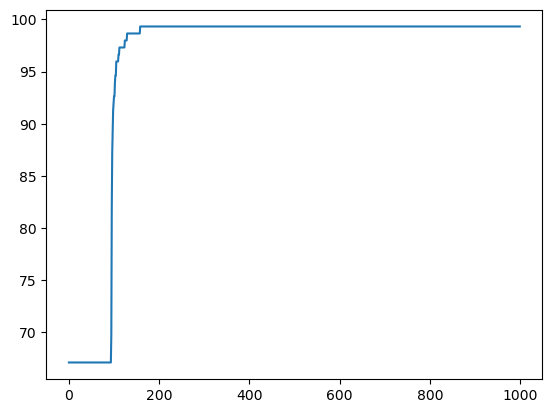

In [1155]:
plt.plot(Accuracy_track)

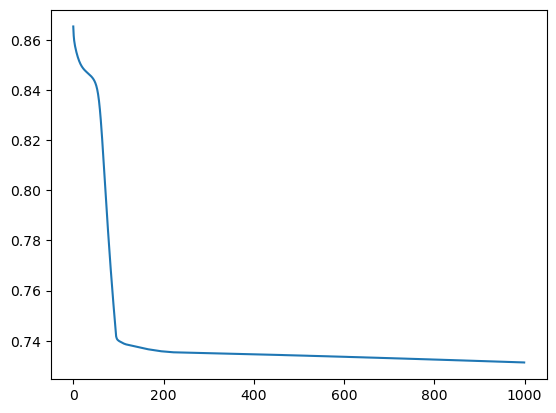

In [1156]:
plt.plot(W_track)

In [1157]:
Accuracy

99.32885906040269